# Identification of human sequences

We'll try to replicate the [Classifying human DNA sequence and random ATCG sequences, using keras CNN](https://github.com/onceupon/deep_learning_DNA) problem, but using PyTorch instead.

In [13]:
import torch
import torch.utils.data as data_utils
from torch import nn
import pandas as pd
from torch.optim import Adam
import os
import src.encoding as enc

In [14]:
dataset = pd.read_csv("datasets/testing/human-exercise.csv")
print(dataset.shape)
dataset

(20000, 2)


,sequence,label
0,CTACTCGGGAGGCTGAGGCAGGAGAATCACTTGAACCAGGGAGTCA...,1
1,CACCTTATCCAGAGAAGCTTCTTCTTTTAGAAAATCAAGCAAAACA...,1
2,AAAGGGGCTGATAGAAAAATAAAGAGATTTGGCCAGGTACGGTGGC...,1
3,AAGTGGATATTCAGACCTCCTTGAGGCCTTCGTTGGAAACGGGATT...,1
4,ATACCATGACAAAGATATTATTAGCCAATTTTTAGAGAGAAGGAAA...,1
...,...,...
19995,AAGACGAGTGGTTACCCCCTGTGAGACTGCCGCGCGTGGTGGTCGG...,0
19996,ACGAGGCCATCTAGAGCGCAACGAAACTGCAAGAAAATACGTCCGA...,0
19997,CATCTTTACCCAATTTGTGTGTGGAAAGGTGTCAGCGATGCTTTGG...,0
19998,ATAAGTAACTCCAGTCGAGCGGAAGGTATAGTGGCACGGGGTTTAG...,0


As we can see, this dataset contains the sequence and the corresponding positive/negative class labels, with positive class labels corresponding to the human DNA. The amount of positive and negative examples is evenly distributed across the two classes.

1    10000
0    10000
Name: label, dtype: int64


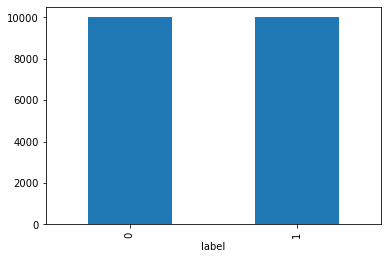

In [15]:
# plot the distribution of each class
dataset.groupby('label').size().plot(kind='bar')

print(dataset['label'].value_counts())

We need now to split the dataset into training, test and validation sets.

In [16]:
fps_x = dataset['sequence'].values
fps_y = dataset['label'].values

Building the model equivalent to the one in the paper.

In [17]:
%load_ext autoreload
%autoreload 2
from src.models import Net
from src.train import traindata
from src.test import test
from src.prepare_data import prepare_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
torch.manual_seed(2022)
os.environ["CUDA_VISIBLE_DEVICES"] = '4,5'
device = torch.device('cuda:0')

epochs = 100
lr = 0.004
loss_function = nn.CrossEntropyLoss()
model = Net().to(device)
optimizer = Adam(model.parameters(), lr=lr)

trainloader, testloader, validloader = prepare_data(
    fps_x, fps_y, 
    mode='one_hot',
    batch_size=16, 
)
model = traindata(device, model, epochs, optimizer, loss_function, trainloader, validloader, patience=2)

# Test
acc, mcc, report = test(device, model, testloader)
print('Accuracy: %.3f' % acc)
print('MCC: %.3f' % mcc)
print(report)

x_train.shape: (12000, 250, 4)
y_train.shape: (12000,)
x_test.shape: (4000, 250, 4)
y_test.shape: (4000,)
x_cv.shape: (4000, 250, 4)
y_cv.shape: (4000,)
[1/100, 0/750] loss: 0.65400922
[1/100, 100/750] loss: 0.56396806
[1/100, 200/750] loss: 0.42583612
[1/100, 300/750] loss: 0.45813543
[1/100, 400/750] loss: 0.4750354
[1/100, 500/750] loss: 0.37468842
[1/100, 600/750] loss: 0.39981669
[1/100, 700/750] loss: 0.37857983
The Current Loss: 0.3295469402074814
trigger times: 0
[2/100, 0/750] loss: 0.32722062
[2/100, 100/750] loss: 0.32195234
[2/100, 200/750] loss: 0.40032765
[2/100, 300/750] loss: 0.37809104
[2/100, 400/750] loss: 0.31472594
[2/100, 500/750] loss: 0.38382658
[2/100, 600/750] loss: 0.4411293
[2/100, 700/750] loss: 0.32032967
The Current Loss: 0.3268485641479492
trigger times: 0
[3/100, 0/750] loss: 0.37900347
[3/100, 100/750] loss: 0.37352976
[3/100, 200/750] loss: 0.31326753
[3/100, 300/750] loss: 0.31694633
[3/100, 400/750] loss: 0.31590736
[3/100, 500/750] loss: 0.31578314